# 連立常微分方程式



Van der Pol方程式  
<img src="https://latex.codecogs.com/png.latex?\bg_white&space;\frac{\mathrm{d}^2&space;x}{\mathrm{d}&space;t^2}&space;=&space;K(1-x^2)\frac{\mathrm{d}&space;x}{\mathrm{d}&space;t}-x">  
<br>
<img src=https://latex.codecogs.com/svg.image?x&space;=&space;x_{1},&space;&space;\dot{x}&space;=&space;x_2&space;>  
とおくと方程式は次の連立ODEになる．  
<br>
<img src="https://latex.codecogs.com/svg.image?\begin{pmatrix}&space;\dot{x}_1\\\dot{x}_2\end{pmatrix}&space;=&space;\begin{pmatrix}&space;x_2\\K(1-x_1^2)x_2-x_1\end{pmatrix}" title="\begin{pmatrix} \dot{x}_1\\\dot{x}_2\end{pmatrix} = \begin{pmatrix} x_2\\K(1-x_1^2)x_2-x_1\end{pmatrix}" />  


In [17]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

## 微分方程式を定義
時刻`t`, 状態ベクトルの配列`x`, ...を受け取り，`x`の微分を**一次元の配列**で返す関数を作る．  
返り値は標準のリストでもndarrayでもよい．  

In [18]:
def dX(t, X, K):
    """ODE"""
    
    x1, x2 = X
    
    dx1 = x2
    dx2 = K * (1-x1**2) * x2 - x1
    
    return np.array([dx1, dx2])

初期値，刻み時間等をセット

In [19]:
TIME_SPAN = 20
TIME_INTERVAL = 0.01
X0 = np.array([1, 0])

微分方程式をsolve_ivpに渡して解く

In [20]:
sol = integrate.solve_ivp(
    fun = dX,
    t_span = (0, TIME_SPAN),
    y0 = X0,
    t_eval=np.arange(0, TIME_SPAN, TIME_INTERVAL),
    args=(2,)
)

解のプロット

Text(0.5, 0, 't')

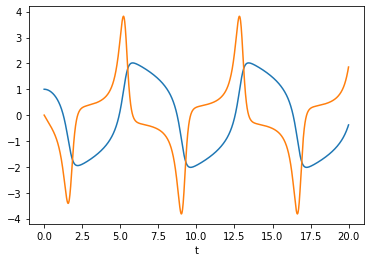

In [23]:
plt.plot(sol.t, sol.y[0], label="x1")
plt.plot(sol.t, sol.y[1], label="x2")
plt.xlabel("t")

Text(0, 0.5, 'x2')

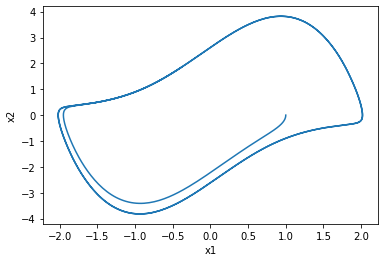

In [24]:
plt.plot(sol.y[0], sol.y[1])
plt.xlabel("x1")
plt.ylabel("x2")

### よくやるミス
微分方程式の関数の戻り値を二次元のnarrayにしてしまう．  
こういうの↓  
```python
def dX(t, X, ...):
    
    # 何かの計算 #

    V = np.array([
        [dx],
        [dy],
        [dz]
    ])  # 2次元配列
    return V
```  
<br>

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed